# Part 3: Data quality insights.

## Generate some data quality insights for the random forest model. Visualization: Completeness vs. Feature importance graph.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [2]:
annual_features_outputs = pd.read_excel('annual_features_outputs.xlsx')

In [3]:
X_ann = annual_features_outputs.drop(['response', 'Unnamed: 0', 'customer_id'], axis = 1)
y_ann = annual_features_outputs['response']

In [4]:
X_ann

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,39,...,1,1,1,0,0,0,0,0,0,1
1,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,98,...,0,3,0,0,2,0,0,0,0,1
2,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,79,...,0,1,1,0,0,0,0,1,0,0
3,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,55,...,2,0,2,0,0,0,0,1,0,0
4,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,79,0,...,1,1,2,0,0,0,0,0,0,0
6880,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,45,0,...,0,0,0,0,0,0,0,0,0,0
6881,64.000000,54.400000,47.000000,32.500000,0.000000,69,79,75,49,0,...,0,1,1,0,0,0,0,0,0,0
6882,52.000000,25.250000,28.000000,21.000000,0.000000,64,30,39,24,0,...,0,0,2,0,0,0,0,0,0,0


In [5]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_ann, y_ann, test_size=2/3, random_state=1148)

In [6]:
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)#.iloc[:, 1:])

In [7]:
completeness = 100 * (X_ann.astype(bool).sum() / X_ann.shape[0])
completeness

ann_txn_amt_ave_2011    94.392795
ann_txn_amt_ave_2012    98.837885
ann_txn_amt_ave_2013    98.794306
ann_txn_amt_ave_2014    98.794306
ann_txn_amt_ave_2015    61.374201
                          ...    
cnt_2015_Saturday       12.042417
cnt_2015_Sunday         12.696107
cnt_2015_Thursday       13.291691
cnt_2015_Tuesday        12.739686
cnt_2015_Wednesday      11.853574
Length: 75, dtype: float64

In [8]:
# The best model below is created as a result of fine-tuning previously.
estimator     = RandomForestClassifier(random_state=1147, n_estimators = 200, max_depth = 6, class_weight = 'balanced')
rf_best_model = estimator.fit(X_train_annual_scaled, y_train_annual)

In [9]:
importances = rf_best_model.feature_importances_
importances

array([0.00944195, 0.01429668, 0.02764468, 0.03351661, 0.01359439,
       0.01075468, 0.01470861, 0.02677851, 0.04079541, 0.01234255,
       0.01088713, 0.01679151, 0.02598346, 0.02934851, 0.01557092,
       0.00928796, 0.01598971, 0.01727592, 0.03107654, 0.00324984,
       0.00787515, 0.01425055, 0.01794422, 0.02227436, 0.00280438,
       0.01357859, 0.01214238, 0.07893624, 0.11215667, 0.01152994,
       0.00880907, 0.01323405, 0.01499966, 0.02740135, 0.00442312,
       0.00497251, 0.00593609, 0.03292168, 0.08448277, 0.01051444,
       0.00154629, 0.00207994, 0.00195328, 0.0020376 , 0.00211573,
       0.00106552, 0.00149952, 0.00110264, 0.00268547, 0.00259921,
       0.00258016, 0.00351694, 0.00452205, 0.00239686, 0.00248852,
       0.00574202, 0.00367942, 0.00421682, 0.00708552, 0.00258662,
       0.00298885, 0.00396031, 0.00572111, 0.00410596, 0.01714795,
       0.00583507, 0.00412956, 0.00757381, 0.00071445, 0.00278122,
       0.00058484, 0.00080114, 0.00349902, 0.00055851, 0.00157

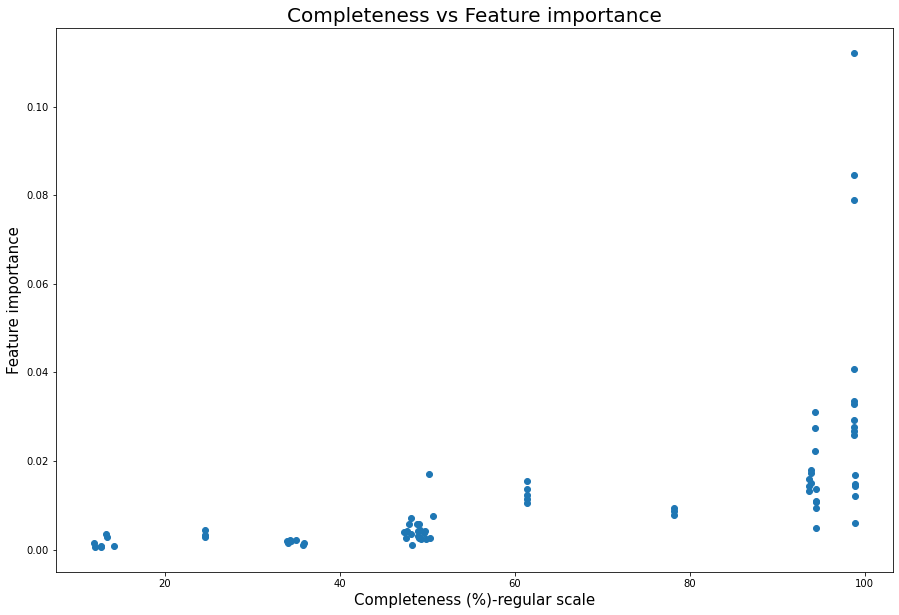

In [11]:
# Plot the Completeness vs Feature importance graph.
fig = plt.figure(figsize = (15, 10))
ax = plt.gca()

plt.title('Completeness vs Feature importance', fontsize = 20)
plt.xlabel('Completeness (%)-regular scale', fontsize = 15)
plt.ylabel('Feature importance', fontsize = 15)

plt.scatter(completeness, rf_best_model.feature_importances_) 

The Completeness vs Feature importance graph is shown above, with x-axis being completeness in percentage on log scale, and y-axis being feature importance.

Although there are only 75 features in this model, we still observe a clear trend for completeness vs feature importance. As completeness increases, feature importance tend to increase together. For features with completeness above 90%, the feature importances are significantly higher than low completeness features. For features with completeness less than 50%, their importances are low and close to 0. 

Notice that we have a few clusters for completeness for features, that is, for example, we have a few features with about 50% completeness but no features with 50%-60% completeness, then a few features with completeness slighly above 60%, but no feature with 65%-75% completeness... This is because there are 25 types of features, many of them are similar(statistics like max, min, standard deviation, etc.), and each type has 5 replications (year 2011 to 2015), therefore, we would expect similar completeness for some features.

To improve the model, one way is to group the feature importances by each year, and delete a year or two with least overall feature importance. As I explained before, the completeness are somehow clustered, feature types are similar, with 5-year replications, so we would expect small year-to-year variations, while large between-type feature variations (for example, it is likely that ann_txn_amt_ave_2011 behaves similarly as ann_txn_amt_ave_2012, but behaves differently than ann_txn_amt_min_2011).